In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('datasets/daily_temperature.csv', infer_datetime_format=True, parse_dates=[0], dtype={'temp': np.float})

In [3]:
df.head()

,date,temp
0,2019-01-01,55.0
1,2019-02-01,56.8
2,2019-03-01,56.3
3,2019-04-01,54.0
4,2019-05-01,55.8


In [0]:
df['temp'] = df.temp.fillna(method='ffill')

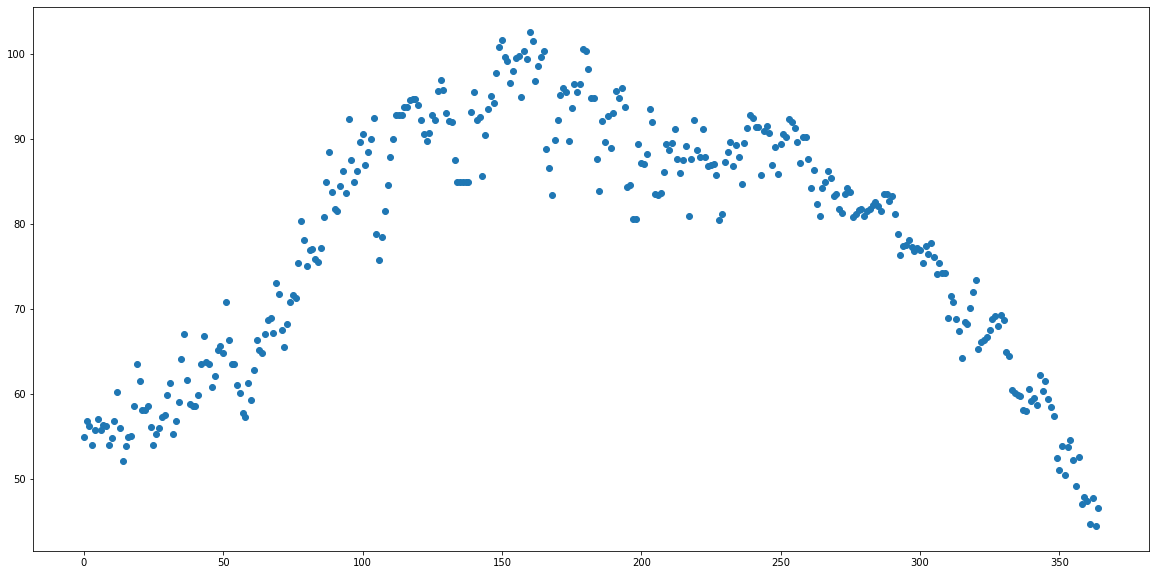

In [5]:
plt.figure(figsize=(20, 10))
plt.scatter(df.index, df.temp)

In [0]:
v_10 = []
v_50 = []

beta_10 = 0.9    # For ~10 days averaging
beta_50 = 0.98   # For ~50 days averaging

for i in range(df.shape[0]):
  
  if i==0:
    v_i_1_10 = 0
    v_i_1_50 = 0
  else:
    v_i_1_10 = v_10[i-1]
    v_i_1_50 = v_50[i-1]
  
  v_10.append(beta_10*v_i_1_10 + (1-beta_10)*df.iloc[i, 1])
  v_50.append(beta_50*v_i_1_50 + (1-beta_50)*df.iloc[i, 1])

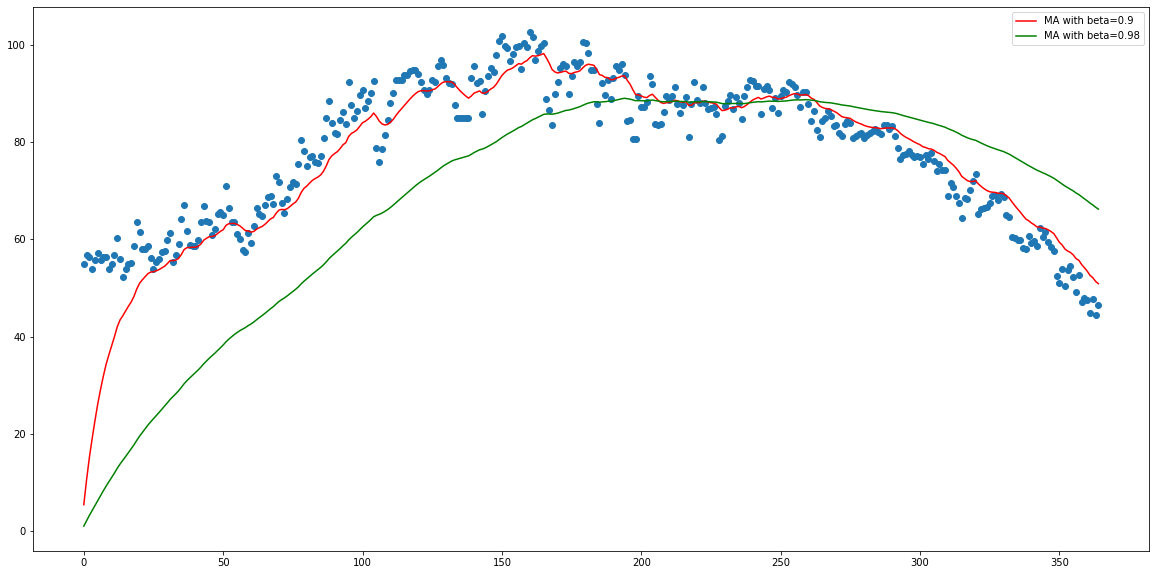

In [7]:
plt.figure(figsize=(20, 10))
plt.scatter([i for i in range(df.shape[0])], df.temp)
plt.plot(np.array(v_10), c='red', label='MA with beta=0.9')
plt.plot(np.array(v_50), c='green', label='MA with beta=0.98')
plt.legend()
plt.show()

### Bias Correction

In [0]:
df2 = pd.DataFrame([[pd.to_datetime('2019-01-01'), 0]], columns=['date','temp'])
df = pd.concat([df2, df]).reset_index(drop=True)

In [0]:
v_corr_10 = [df.iloc[0, 1]]
v_10 = [df.iloc[0, 1]]
v_corr_50 = [df.iloc[0, 1]]
v_50 = [df.iloc[0, 1]]

beta_10 = 0.9
beta_50 = 0.98

for i in range(1, df.shape[0]):
  v_corr_10.append(beta_10*v_10[i-1] + (1-beta_10)*df.iloc[i, 1])
  v_10.append(v_corr_10[i])
  v_corr_50.append(beta_50*v_50[i-1] + (1-beta_50)*df.iloc[i, 1])
  v_50.append(v_corr_50[i])
  if i!=0:
    v_corr_10[i] = v_corr_10[i]/(np.round(1-beta_10**i, 2))
    v_corr_50[i] = v_corr_50[i]/(np.round(1-beta_50**i, 2))

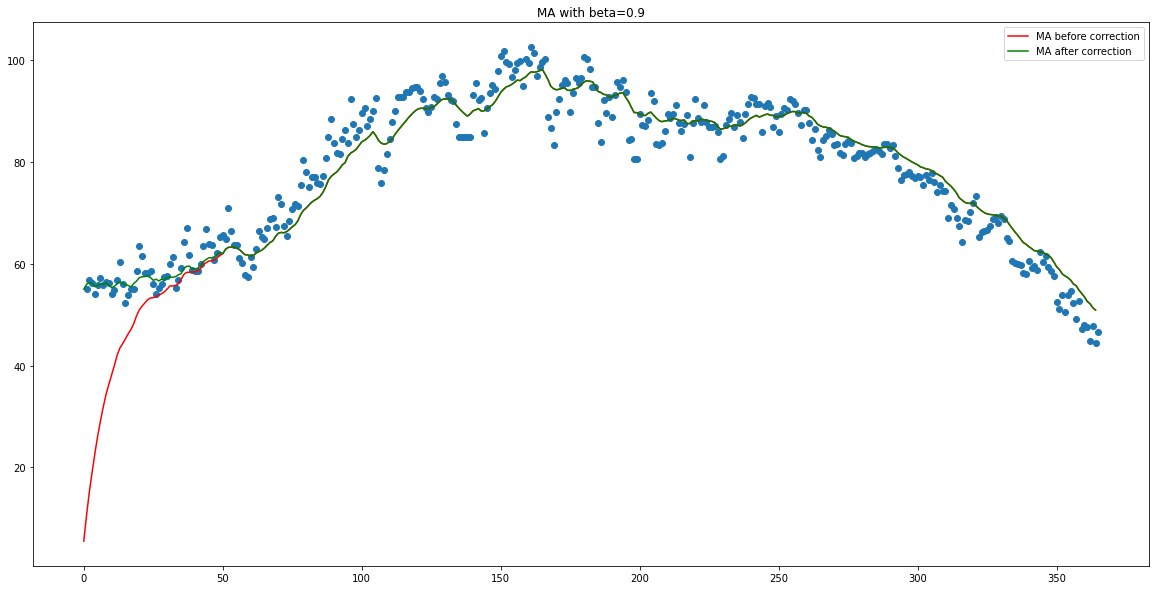

In [10]:
plt.figure(figsize=(20, 10))
plt.scatter([i for i in range(1, df.shape[0])], df.temp.iloc[1:])
plt.plot(np.array(v_10[1:]), c='red', label='MA before correction')
plt.plot(np.array(v_corr_10[1:]), c='green', label='MA after correction')
plt.title('MA with beta=0.9')
plt.legend()
plt.show()

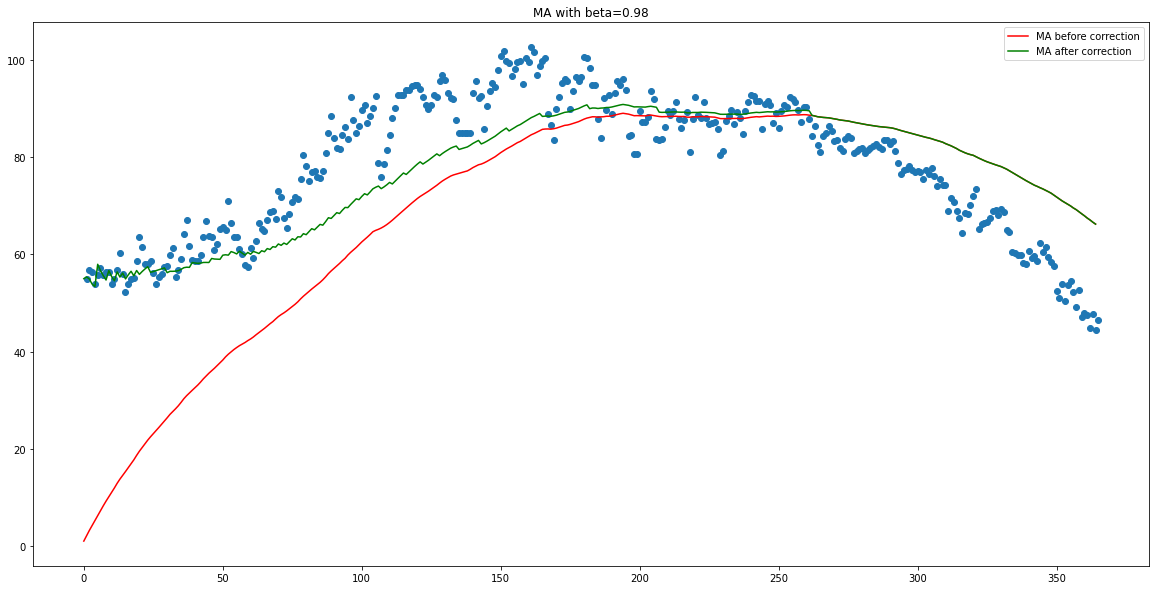

In [11]:
plt.figure(figsize=(20, 10))
plt.scatter([i for i in range(1, df.shape[0])], df.temp.iloc[1:])
plt.plot(np.array(v_50[1:]), c='red', label='MA before correction')
plt.plot(np.array(v_corr_50[1:]), c='green', label='MA after correction')
plt.title('MA with beta=0.98')
plt.legend()
plt.show()